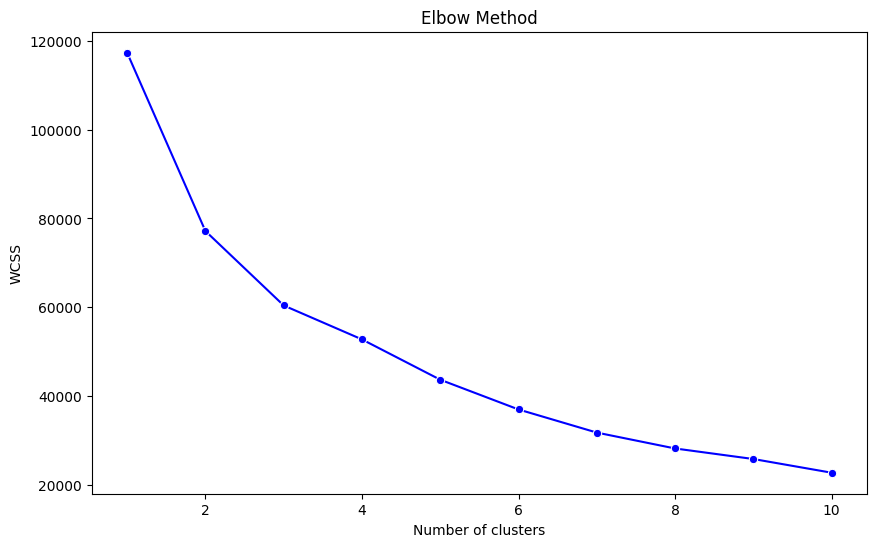

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 9 (	) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


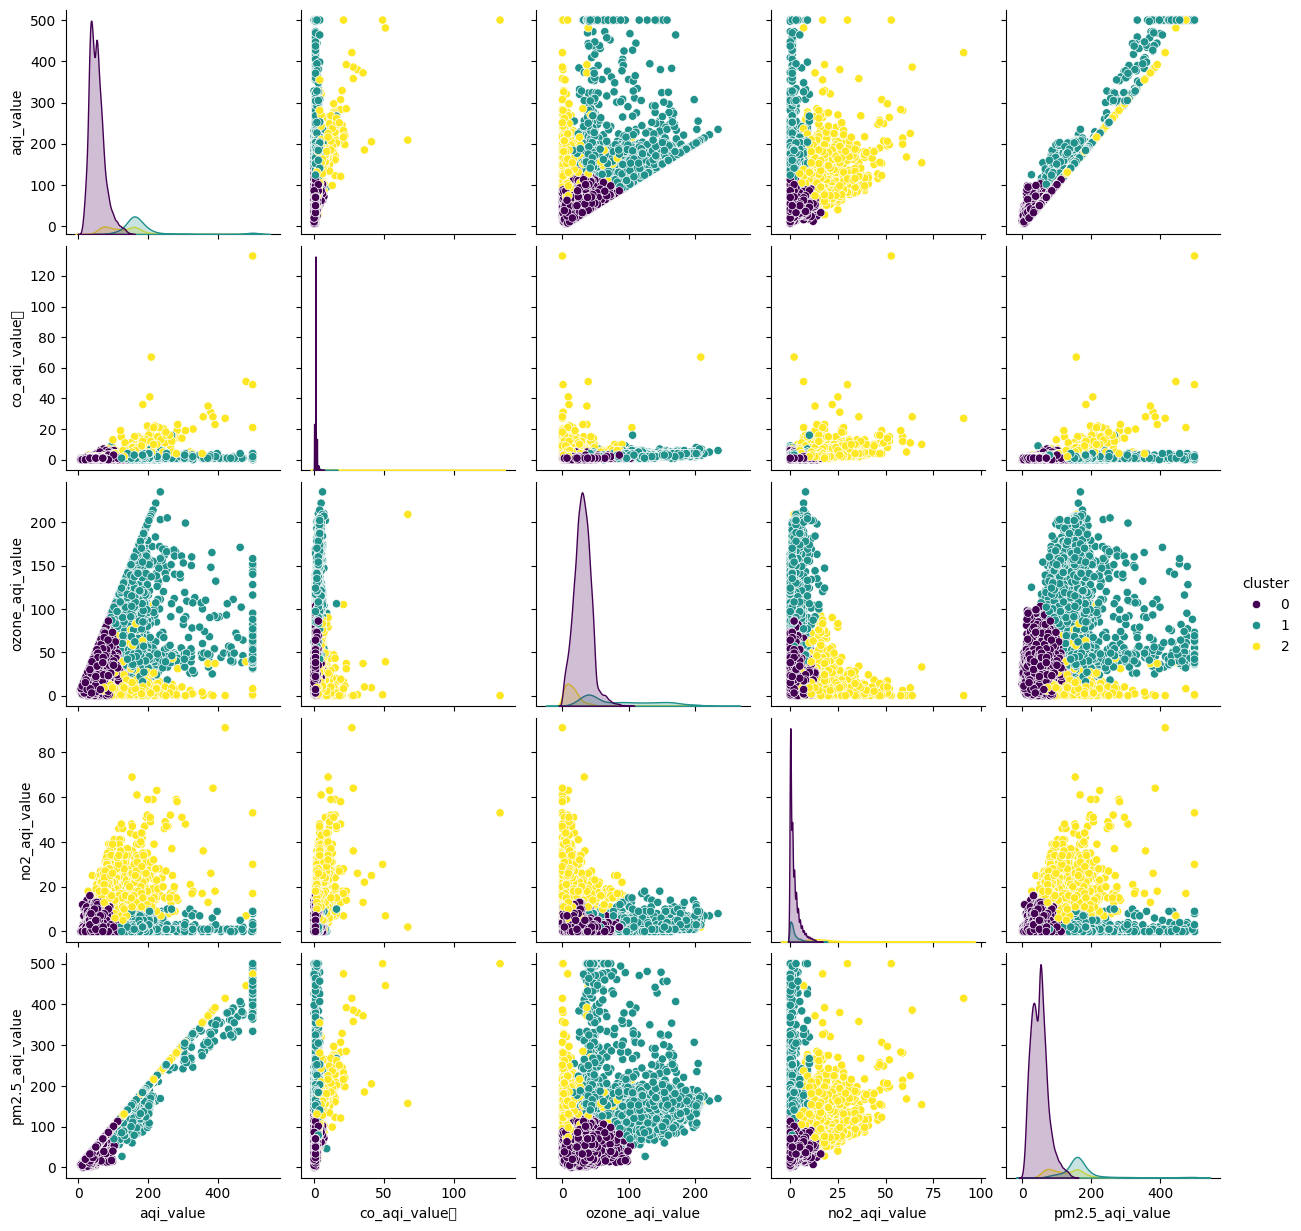

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv("global_air_pollution_data.csv")

# Select features for clustering
features = data[['aqi_value', 'co_aqi_value\t', 'ozone_aqi_value', 'no2_aqi_value', 'pm2.5_aqi_value']]

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine optimal number of clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10,6))
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='blue')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Based on Elbow Method, choose optimal number of clusters
# Let's say we choose 3 clusters

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original dataframe
data['cluster'] = clusters

# Visualize clusters
sns.pairplot(data, hue='cluster', palette='viridis')
plt.show()


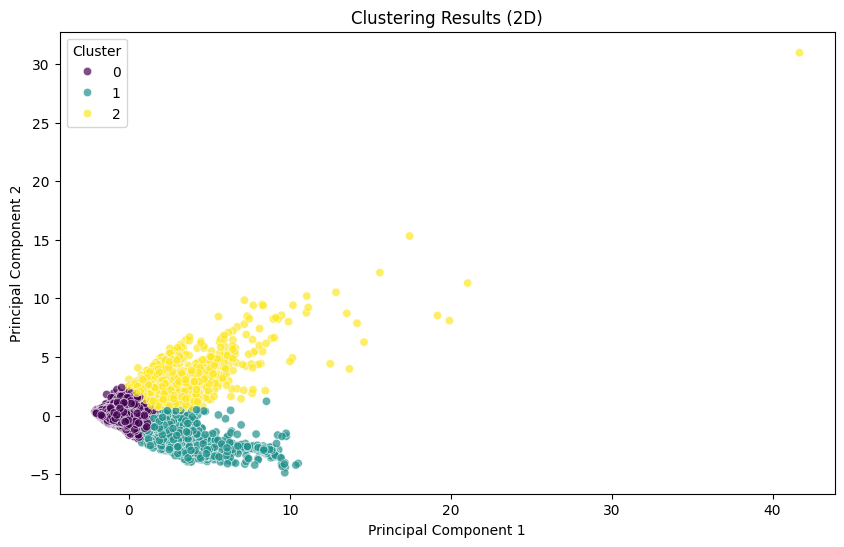

In [4]:
# Import library
from sklearn.decomposition import PCA

# Reduce dimensionality for visualization (optional)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Create dataframe for visualization
visual_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
visual_df['cluster'] = clusters

# Visualize clusters in 2D space
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=visual_df, hue='cluster', palette='viridis', alpha=0.7)
plt.title('Clustering Results (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


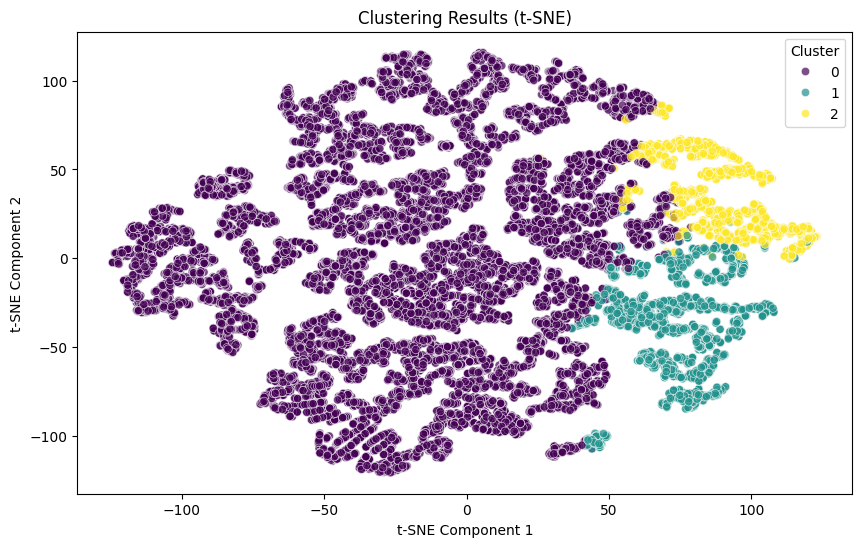

In [5]:
from sklearn.manifold import TSNE

# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(scaled_features)

# Create dataframe for visualization
tsne_df = pd.DataFrame(data=tsne_components, columns=['TSNE1', 'TSNE2'])
tsne_df['cluster'] = clusters

# Visualize clusters in 2D space using t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', data=tsne_df, hue='cluster', palette='viridis', alpha=0.7)
plt.title('Clustering Results (t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()


In [7]:
# Analyze cluster 0
cluster_0 = data[data['cluster'] == 0]
print("Cluster 0:")
print(cluster_0.describe())

# Analyze cluster 1
cluster_1 = data[data['cluster'] == 1]
print("\nCluster 1:")
print(cluster_1.describe())

# Analyze cluster 2
cluster_2 = data[data['cluster'] == 2]
print("\nCluster 2:")
print(cluster_2.describe())


Cluster 0:
          aqi_value  co_aqi_value\t  ozone_aqi_value  no2_aqi_value  \
count  19241.000000    19241.000000     19241.000000   19241.000000   
mean      52.545138        0.994179        30.210540       1.963983   
std       21.703314        0.609836        13.105949       2.582144   
min        6.000000        0.000000         0.000000       0.000000   
25%       37.000000        1.000000        22.000000       0.000000   
50%       50.000000        1.000000        30.000000       1.000000   
75%       64.000000        1.000000        38.000000       3.000000   
max      153.000000        7.000000       103.000000      16.000000   

       pm2.5_aqi_value  cluster  
count     19241.000000  19241.0  
mean         49.536407      0.0  
std          24.164770      0.0  
min           0.000000      0.0  
25%          31.000000      0.0  
50%          49.000000      0.0  
75%          63.000000      0.0  
max         153.000000      0.0  

Cluster 1:
         aqi_value  co_aqi_valu

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# List untuk menyimpan Silhouette Score untuk setiap kluster
silhouette_scores = []

# Inisialisasi model KMeans dengan 3 kluster (sesuaikan dengan jumlah kluster yang Anda miliki)
kmeans = KMeans(n_clusters=3)

# Fit model ke data
kmeans.fit(features)

# Mendapatkan label kluster untuk setiap sampel
labels = kmeans.labels_

# Menghitung Silhouette Score untuk setiap kluster
silhouette_avg = silhouette_score(features, labels)
silhouette_scores.append(silhouette_avg)

# Menampilkan Silhouette Score untuk setiap kluster
for i, score in enumerate(silhouette_scores):
    print(f"Silhouette Score for Cluster {i}: {score}")



Silhouette Score for Cluster 0: 0.4264638140837693
